In [1]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root='../data', train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="../data", train=False, transform=trans, download=True)
print(len(mnist_train))
print(len(mnist_test))


100%|██████████| 26421880/26421880 [00:11<00:00, 2262039.80it/s]


Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 145953.89it/s]


Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:04<00:00, 917783.96it/s] 


Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5154518.26it/s]

Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw

60000
10000


In [2]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [3]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
    'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [40]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
print(X.shape, y.shape)


torch.Size([18, 1, 28, 28]) torch.Size([18])


In [34]:
X = X.reshape(18, 28, 28)

In [19]:
import matplotlib.pyplot as plt

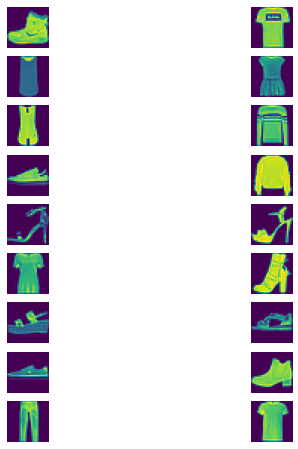

In [38]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 2, 9
for i in range(0, cols * rows):
    img, label = X[i], y[i]
    figure.add_subplot(rows, cols, i+1)
    plt.axis("off")
    plt.imshow(img.numpy())
plt.show()

In [41]:
batch_size = 256
def get_dataloader_workers():
    return 4
train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers())

In [43]:
for X, y in train_iter:
    continue

In [47]:
print(type(mnist_train))

<class 'torchvision.datasets.mnist.FashionMNIST'>


In [49]:
def load_data_fashion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="../data",train=True,transform=trans,download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="../data",train=False,transform=trans,download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,num_workers=get_dataloader_workers()),data.DataLoader(mnist_test, batch_size, shuffle=False,
    num_workers=get_dataloader_workers()))


In [50]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64
